# A common interface for handling gridded data

We've already seen that astropy has a Table class that provides a uniform way of reading, manipulating, and writing table data. Similarly, the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package provides an [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData) class that provide a common interface to datasets that consist of an n-dimensional array optionally with WCS information. In addition, this sub-package provides a set of utilities that can operate on NDData objects as well as Numpy arrays.



<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create an NDData object</li>
<li>Create/read in a CCDData object</li>
<li>Extract cutouts from image data with WCS information</li>
<li>Resize n-dimensional data</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.nddata. For more information about the features presented below as well as other available features, you can read the
[astropy.nddata documentation](https://docs.astropy.org/en/stable/nddata/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating an NDData object

The main class in the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package is [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData):

In [2]:
from astropy.nddata import NDData

The simplest way to initialize NDData is with a data array:

In [3]:
import numpy as np
data = np.random.random((16, 16, 16))

In [4]:
ndd1 = NDData(data)

In [5]:
ndd1.data

array([[[0.72091002, 0.04971911, 0.80702241, ..., 0.81982622,
         0.14141205, 0.44796277],
        [0.09153389, 0.66865652, 0.72848212, ..., 0.89611144,
         0.43401487, 0.58514626],
        [0.68135626, 0.68293309, 0.1060647 , ..., 0.96330012,
         0.21304461, 0.48411348],
        ...,
        [0.54037163, 0.94552148, 0.1914052 , ..., 0.53772221,
         0.48867492, 0.30790516],
        [0.55046644, 0.52150957, 0.96667332, ..., 0.28561116,
         0.31294445, 0.9679996 ],
        [0.72280046, 0.84272623, 0.09153124, ..., 0.82333743,
         0.29626659, 0.37318974]],

       [[0.35474293, 0.30063927, 0.88150605, ..., 0.09754342,
         0.16125283, 0.92661515],
        [0.32093887, 0.66873645, 0.39376584, ..., 0.04594399,
         0.08453983, 0.03531717],
        [0.93747865, 0.73807442, 0.53031021, ..., 0.95874459,
         0.40425381, 0.91533762],
        ...,
        [0.6822581 , 0.83794371, 0.4677973 , ..., 0.21605299,
         0.99935935, 0.37550638],
        [0.4

The real value from NDData comes from the ability to add other meta-data, such as the unit, a mask, or WCS information:

In [6]:
from astropy import units as u
from astropy.wcs import WCS
wcs = WCS(naxis=3)
mask = data > 0.5

In [7]:
ndd2 = NDData(data, mask=mask, unit=u.Jy, wcs=wcs)

In [8]:
ndd2.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : ''  ''  ''  
CRVAL : 0.0  0.0  0.0  
CRPIX : 0.0  0.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

It is also possible to attach uncertainties:

In [9]:
from astropy.nddata import StdDevUncertainty
uncertainty = StdDevUncertainty(data / 10)
ndd3 = NDData(data, uncertainty=uncertainty)

## Using the CCDData class

For now, NDData is just a data container, so it does not have useful methods on it. A more useful class is [CCDData](http://docs.astropy.org/en/stable/api/astropy.nddata.CCDData.html#astropy.nddata.CCDData) which is a sub-class of NDData and is a good example to demonstrate NDData functionality:

In [10]:
from astropy.nddata import CCDData

The CCDData class recognizes FITS files:

In [11]:
ccd = CCDData.read('data/gc_2mass_k.fits', unit='count')
ccd

CCDData([[563.1581 , 540.4065 , 524.3385 , ..., 498.93182, 501.9532 ,
          640.75134],
         [514.72516, 586.9167 , 514.5878 , ..., 505.34076, 504.9287 ,
          506.39362],
         [510.01007, 510.19318, 521.3172 , ..., 532.62427, 515.7323 ,
          526.5816 ],
         ...,
         [530.24384, 532.5785 , 536.1492 , ..., 557.43585, 510.60516,
          517.9296 ],
         [521.363  , 524.3385 , 518.0212 , ..., 540.0403 , 546.3118 ,
          544.25183],
         [519.6692 , 525.71185, 522.8278 , ..., 544.7096 , 522.2785 ,
          543.06165]], unit='ct')

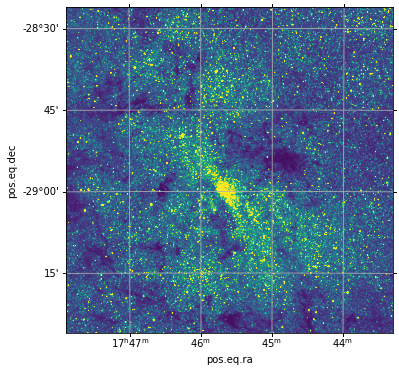

In [12]:
plt.subplot(projection=ccd.wcs)
plt.imshow(ccd.data, vmax=800)
plt.grid()

A useful aspect of NDData classes like CCDData is that they can be sliced like Numpy arrays and this automatically slices the mask, uncertainty, and WCS (if present):

In [13]:
subccd = ccd[100:300, 200:400]

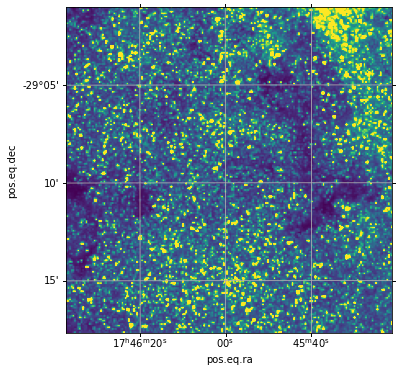

In [14]:
plt.subplot(projection=subccd.wcs)
plt.imshow(subccd.data, vmax=800)
plt.grid()

Another useful feature is the ability to do arithmetic between CCDData objects and have uncertainties propagate automatically:

In [15]:
ccd1 = CCDData([1, 2, 3], unit='count',
               uncertainty=StdDevUncertainty([1, 1.2, 1.5]))
ccd2 = CCDData([0.5, 0.5, 0.5], unit='count',
               uncertainty=StdDevUncertainty([0.2, 0.1, 0.3]))

In [16]:
ccd_sub = ccd1.subtract(ccd2)

In [17]:
ccd_sub.data

array([0.5, 1.5, 2.5])

In [18]:
ccd_sub.uncertainty

StdDevUncertainty([1.0198039 , 1.20415946, 1.52970585])

Note however that at the moment this framework does not understand correlated errors!

In [19]:
ccd1.divide(ccd1).uncertainty

StdDevUncertainty([1.41421356, 0.84852814, 0.70710678])

## Extracting cutouts from images

As seen above, we can easily extract cutouts of NDData objects by using slicing - however, the astropy.nddata sub-package also provides a [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html#astropy.nddata.Cutout2D) class that can be used to generate cutouts from data, either as NDData objects or as plain arrays and WCS objects:

In [20]:
from astropy.nddata import Cutout2D

One of the main benefits of this class is that allows cutouts to be extracted by specifying celestial coordinates rather than just pixel coordinates:

In [21]:
from astropy.coordinates import SkyCoord
galcen = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

In [22]:
cutout = Cutout2D(ccd.data, galcen, 20 * u.arcmin, wcs=ccd.wcs)

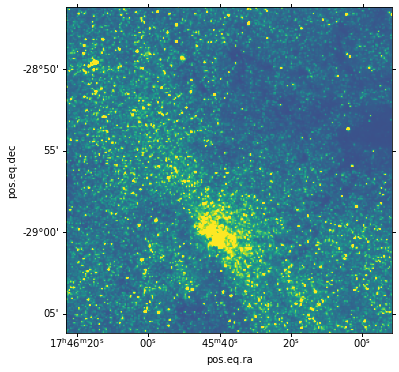

In [23]:
plt.subplot(projection=cutout.wcs)
plt.imshow(cutout.data, vmin=300, vmax=1000) 

The Cutout2D object also retains information about where it was extracted from in the image:

<WCSAxesSubplot:>

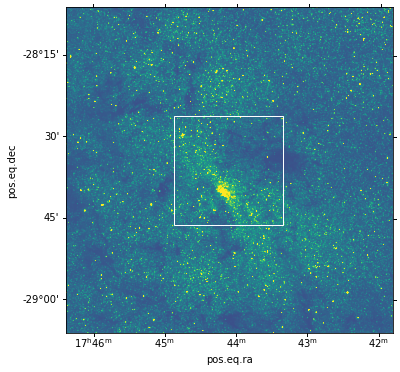

In [24]:
plt.subplot(projection=cutout.wcs)
plt.imshow(ccd.data, vmin=300, vmax=1000) 
cutout.plot_on_original(color='white') 

and we can therefore also convert positions in the cutout back to positions in the original image:

In [25]:
cutout.to_original_position((20, 30))

(257, 268)

## Resizing images

Another set of useful functions in astropy.nddata are [block_reduce](http://docs.astropy.org/en/stable/api/astropy.nddata.block_reduce.html#astropy.nddata.block_reduce) and [block_replicate](http://docs.astropy.org/en/stable/api/astropy.nddata.block_replicate.html#astropy.nddata.block_replicate) which can be used to downsample and upsample data by integer factors:

In [26]:
from astropy.nddata import block_reduce, block_replicate

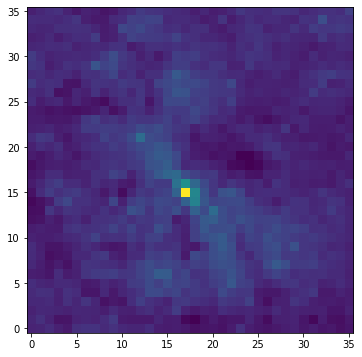

In [27]:
plt.imshow(block_reduce(ccd.data, 20))

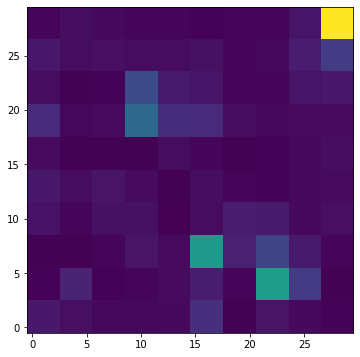

In [28]:
plt.imshow(block_replicate(ccd.data[:10, :10], 3))

For now, this does not properly support NDData objects or scaling the WCS information (see [astropy/astropy#4796](https://github.com/astropy/astropy/issues/4796) for an example of as astropy feature request!).

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)